Persamaan	= x^3 + 10x^2 - 7x - 195

Batas bawah	= -10.0 
Batas atas	= 8.0 
Ketelitian	= 7 angka dibelakang koma

------- ROOT FOUND ------- 
Akar		= 3.9917231 
dengan f(akar)	= -1.945664962477167e-09 

           x1         f(x1)        x2         f(x2)        x3         f(x3)
0  -10.000000 -1.250000e+02  8.000000  9.010000e+02 -1.000000 -1.790000e+02
1   -1.000000 -1.790000e+02  8.000000  9.010000e+02  3.500000 -5.412500e+01
2    3.500000 -5.412500e+01  8.000000  9.010000e+02  5.750000  2.854844e+02
3    3.500000 -5.412500e+01  5.750000  2.854844e+02  4.625000  8.546289e+01
4    3.500000 -5.412500e+01  4.625000  8.546289e+01  4.062500  8.648682e+00
5    3.500000 -5.412500e+01  4.062500  8.648682e+00  3.781250 -2.442648e+01
6    3.781250 -2.442648e+01  4.062500  8.648682e+00  3.921875 -8.319324e+00
7    3.921875 -8.319324e+00  4.062500  8.648682e+00  3.992188  5.602980e-02
8    3.921875 -8.319324e+00  3.992188  5.602980e-02  3.957031 -4.158679e+00
9    3.957031 -4.158679e+00  3.992188 

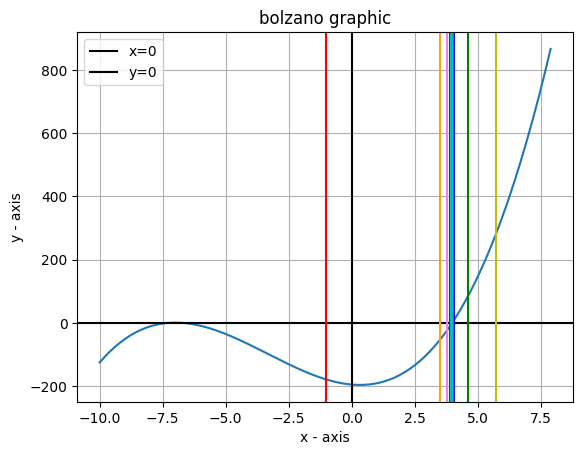

In [1]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from math import *
import pandas as pd

def f(x):
    return (pow(x,3)) + (10*pow(x,2)) - (7*x) - 195

def cek(fA, fB, fX, x1, x2, x3):
    return x1 if (min(abs(fA), min(abs(fB), abs(fX)))==abs(fA)) else x2 if (min(abs(fA), min(abs(fB), abs(fX)))==abs(fB)) else x3

def grafik(xAwal, xAkhir, df):
    lst_clr = ['r', 'orange', 'y', 'g', 'b', 'violet', 'purple', 'c']
    x = np.arange(xAwal, xAkhir, 0.1)
    y = np.vectorize(f)
    plt.plot(x, y(x))

    # animation = FuncAnimation(plt.figure, bolza, 100, interval=500, blit=True, repeat=False)

    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title('bolzano graphic')
    plt.axvline(x=0, c="black", label="x=0")
    plt.axhline(y=0, c="black", label="y=0")
    plt.legend()
    plt.grid()

    j = 0
    for i in df['x3']:
        plt.axvline(x=i, c=lst_clr[j])
        j += 1 if j < 7 else 0
    plt.show()

def show_table(xAwal, xAkhir):
    df = pd.DataFrame(data=all_data, columns=['x1', 'f(x1)', 'x2', 'f(x2)', 'x3', 'f(x3)'])
    print(df)
    grafik(xAwal, xAkhir, df)

def show_root(x1, x2, x3, fA, fB, fX, xAwal, xAkhir, ketelitian):
    print('\n------- ROOT FOUND -------',
          '\nAkar\t\t=', round(cek(fA, fB, fX, x1, x2, x3), ketelitian),
          '\ndengan f(akar)\t=', f(cek(fA, fB, fX, x1, x2, x3)), '\n')
    show_table(xAwal, xAkhir)

all_data = []
def bolza(x1, x2, x3, fA, fB, fX, xAwal, xAkhir, ketelitian):
    if abs(fX) > pow(10, (-1 * ketelitian)):
        all_data.append([x1, fA, x2, fB, x3, fX])
        if fA * fX > 0: x1, fA, fB = x3, fX, f(x2)
        else          : x2, fB, fA = x3, fX, f(x1)

        x3 = (x1 + x2)/2.0
        fX = f(x3)
        
        bolza(x1, x2, x3, fA, fB, fX, xAwal, xAkhir, ketelitian)
    else: show_root(x1, x2, x3, fA, fB, fX, xAwal, xAkhir, ketelitian)

if __name__ == "__main__":
    print('Persamaan\t= x^3 + 10x^2 - 7x - 195')
    x1 = float(input('\nMasukkan batas bawah\t\t\t: '))
    x2 = float(input('Masukkan batas atas\t\t\t: '))
    x3 = (x1+x2)/2.0
    ketelitian = int(input('Masukkan ketelitian angka dibelakang koma : '))

    print('\nBatas bawah\t=', x1,
          '\nBatas atas\t=', x2,
          '\nKetelitian\t=', ketelitian,'angka dibelakang koma')

    fA, fB, fX = f(x1), f(x2), f(x3)
    try: bolza(x1, x2, x3, fA, fB, fX, x1, x2, ketelitian)
    except RecursionError:
        print('\n!!! ROOT NOT FOUND !!!\n')
        show_table(x1, x2)